In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_list = [1,2,3]
y_list = ['z_F30_MinF1_20_FO10', 'z_F45_MinF1_30_FO15', 'z_F60_MinF1_40_FO20']
x_name = ['G', 'S', 'W']
y_name = ['P30_O10', 'P45_O15', 'P60_O20']

In [3]:
raw = pd.read_csv('1z_F30_MinF1_20_FO10/ocba_results.csv', sep='\t')

In [4]:
dfs ={}
for a, x in enumerate(x_list):
    for b, y in enumerate(y_list):
        raw = pd.read_csv(f'{x}{y}/ocba_results.csv', sep='\t')
        col = [i for i in raw.columns[0].split(' ') if i != ''][1:]
        df = pd.DataFrame(columns=col)
        for i in range(raw.shape[0]):
            if i % 2:
                row = [eval(i) for i in raw.iloc[i, 0].split(' ') if i != '']
                df = df.append(pd.DataFrame([row], columns=col), ignore_index=True)
        df.sort_values(by=['mean'], inplace=True)
        dfs[a, b] = df



/var/folders/tf/y94t_kzx3hq6_jh3gnzm07580000gn/T/ipykernel_8117/3739276122.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([row], columns=col), ignore_index=True)
/var/folders/tf/y94t_kzx3hq6_jh3gnzm07580000gn/T/ipykernel_8117/3739276122.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([row], columns=col), ignore_index=True)
/var/folders/tf/y94t_kzx3hq6_jh3gnzm07580000gn/T/ipykernel_8117/3739276122.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([row], columns=col), ignore_index=True)
/var/folders/tf/y94t_kzx3hq6_jh3gnzm07580000gn/T/ipykernel_8117/3739276122.py:10: FutureWarning: The frame.append method is deprecated and will b

In [5]:
dfs[0, 1]

,sample_size,mean,stdev
1,10000,2772.916431,1.0068
2,9286,2774.986165,1.050448
22,3552,2776.354415,1.656957
4,2880,2777.482281,1.931274
18,1887,2779.819032,2.369365
0,832,2780.820287,3.375403
7,271,2788.15559,5.542352
11,145,2791.747465,8.442858
20,336,2793.082678,5.341858
15,134,2796.849885,9.118226


In [6]:
list(dfs[0, 0]['stdev'][:5]*1.96)

[4.76849772, 5.07016328, 8.453180119999999, 10.65647688, 28.371591919999997]

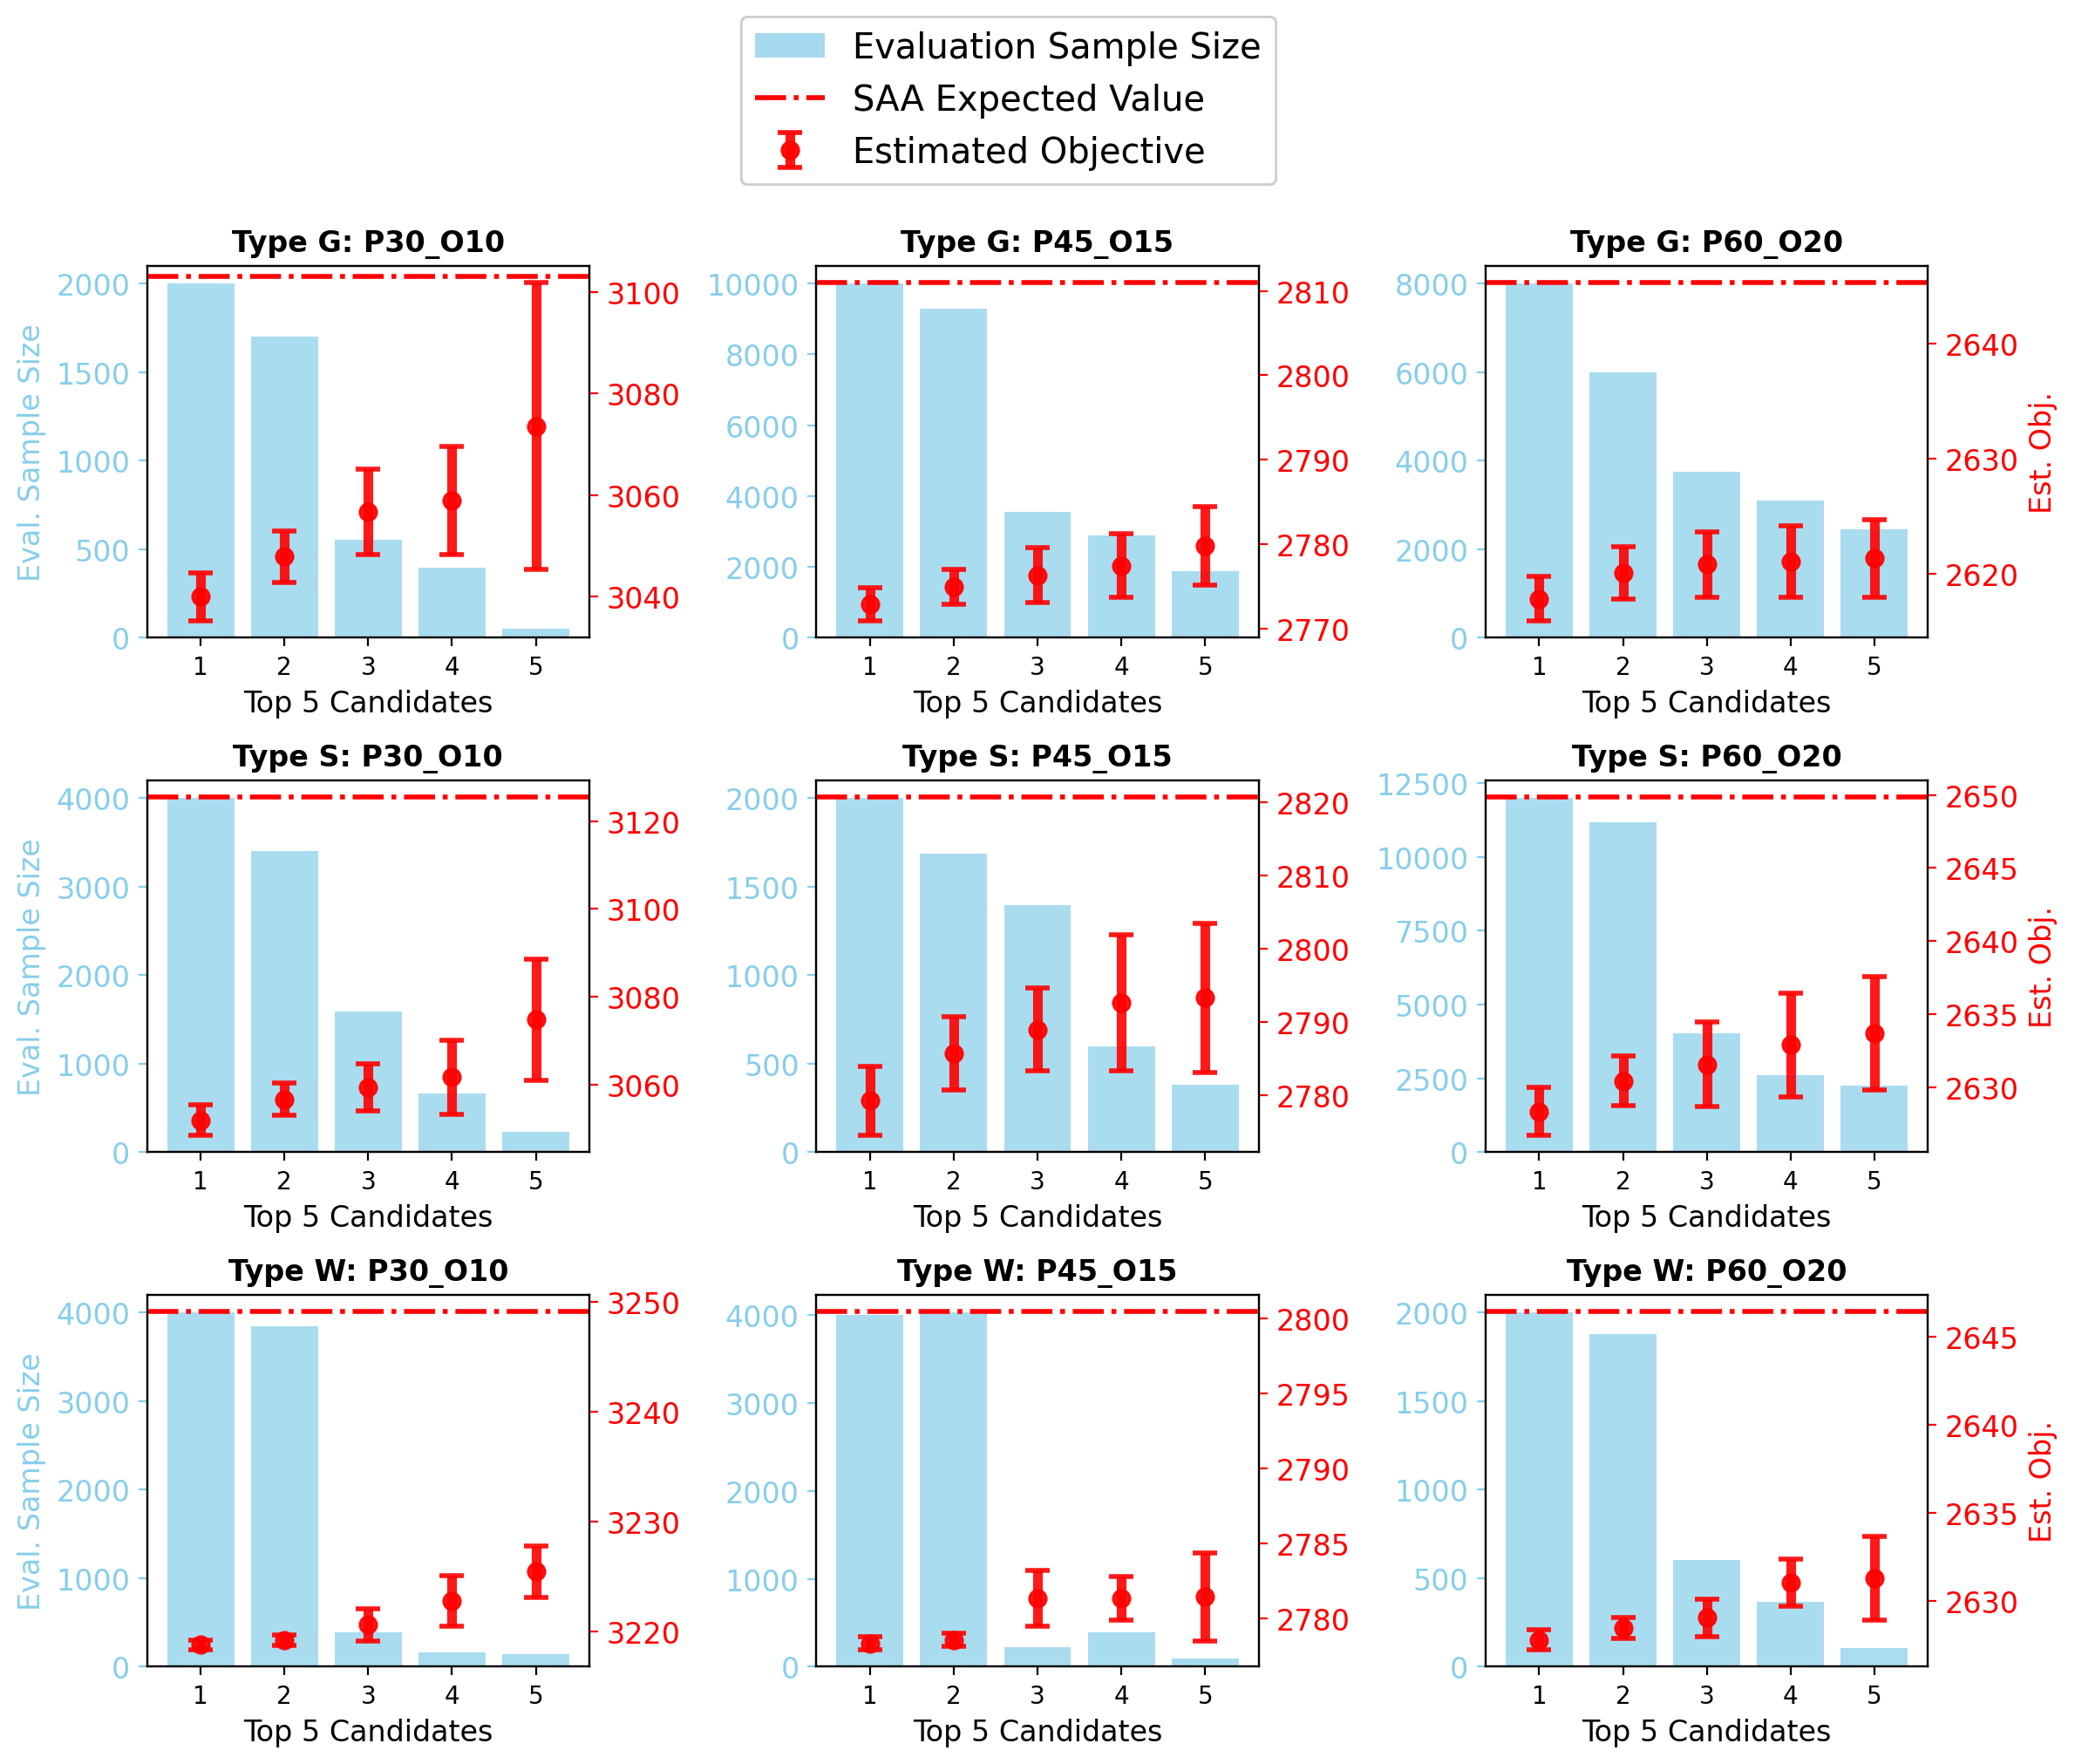

In [12]:
fig, ax = plt.subplots(3, 3, figsize=(12, 9), dpi=200)
N = 5
# colors = ['#5F97D2', '#C82423']
colors = ['skyblue', 'r']
for i in range(3):
    for j in range(3):
        x = range(1, N+1)
        y = dfs[i, j]['mean'][:N]
        yerr = dfs[i, j]['stdev'][:N]*1.96
        bar_y = dfs[i, j]['sample_size'][:N]
        
        ax1 = ax[i, j]
        ax2 = ax1.twinx()
        ax1.bar(x, bar_y, color=colors[0], label='Evaluation Sample Size', alpha=0.7)
        ax2.errorbar(x, y, yerr=yerr, fmt='o',color=colors[1], elinewidth=4, capthick=2, capsize=5, markersize=7, alpha=0.9, label='Estimated Objective')

        ax2.axhline(y=np.mean(dfs[i, j]['mean']), linestyle='-.', color=colors[1], label='SAA Expected Value', linewidth=2)
        ax1.set_xlabel('Top 5 Candidates', fontsize='large')      
        ax2.yaxis.label.set_color(colors[1])
        
        if j == 0:
            ax1.set_ylabel('Eval. Sample Size', color=colors[0], fontsize='large')
        if j == 2:
            ax2.set_ylabel('Est. Obj.', color=colors[1], fontsize='large')
            
        ax1.tick_params(axis='y', colors=colors[0], labelsize='large')
        ax2.tick_params(axis='y', colors=colors[1], labelsize='large')
        
        ax1.set_title(f'Type {x_name[i]}: {y_name[j]}', fontsize='large', fontweight='bold')
        lines_labels = [ax1.get_legend_handles_labels()] + [ax2.get_legend_handles_labels()]
        lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
        fig.legend(lines, labels, bbox_to_anchor=(0.35, 1.13), loc='upper left', fontsize='x-large')

# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
fig.tight_layout()

In [142]:
np.mean(dfs[1, 2]['mean'])

2649.8520641923074

,sample_size,mean,stdev
0,2000,3039.871853,2.432907
1,83,3112.456628,14.268616
2,26,3192.154498,22.650284
3,29,3117.627580,24.705110
4,20,3120.523738,24.703351
5,144,3121.979399,9.192858
6,35,3142.859770,18.773137
7,1699,3047.824425,2.586818
8,20,3150.183786,21.144690
9,57,3094.711384,14.956612
